In [1]:
#Import packages and libraries 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


In [2]:
#load dataframe
df= pd.read_csv(r'C:\Users\danie\Downloads\d9rkejv84kd9rk30fi2l (2)\churn_clean.csv')

In [3]:
#Drop unnecessary columns, look for null values and replace null values
df= df.drop(columns= ['City', 'State','County','Zip','Lat','Lng',
                   'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                   'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 
                   'Tenure', 'MonthlyCharge', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8','PaymentMethod'])
nulls = df.isnull().any()
print(nulls)

CaseOrder            False
Customer_id          False
Interaction          False
UID                  False
Children             False
Age                  False
Income               False
Gender               False
Churn                False
StreamingTV          False
Bandwidth_GB_Year    False
dtype: bool


In [4]:
df.describe()

,CaseOrder,Children,Age,Income,Bandwidth_GB_Year
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.0877,53.078400,39806.926771,3392.341550
std,2886.89568,2.1472,20.698882,28199.916702,2185.294852
min,1.00000,0.0000,18.000000,348.670000,155.506715
25%,2500.75000,0.0000,35.000000,19224.717500,1236.470827
50%,5000.50000,1.0000,53.000000,33170.605000,3279.536903
75%,7500.25000,3.0000,71.000000,53246.170000,5586.141370
max,10000.00000,10.0000,89.000000,258900.700000,7158.981530


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaseOrder          10000 non-null  int64  
 1   Customer_id        10000 non-null  object 
 2   Interaction        10000 non-null  object 
 3   UID                10000 non-null  object 
 4   Children           10000 non-null  int64  
 5   Age                10000 non-null  int64  
 6   Income             10000 non-null  float64
 7   Gender             10000 non-null  object 
 8   Churn              10000 non-null  object 
 9   StreamingTV        10000 non-null  object 
 10  Bandwidth_GB_Year  10000 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [6]:
df['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [7]:
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [8]:
#Z scores - drop if >3
childrenZ= df.loc[: , 'Children']
df['childrenZ'] = stats.zscore(childrenZ)

ageZ = df.loc[: , 'Age']
df['ageZ'] = stats.zscore(ageZ)
              
incomeZ=df.loc[: , 'Income']
df['incomeZ'] = stats.zscore(incomeZ)

#change data type from float to integer

df['childrenZ'] = df['childrenZ'].astype(np.int64)
df['ageZ'] = df['ageZ'].astype(np.int64)
df['incomeZ'] = df['incomeZ'].astype(np.int64)

#drop > 3
df.drop(df[df['childrenZ'] > 3].index, inplace= True)
df.drop(df[df['childrenZ'] < -3].index, inplace= True)
df.drop(df[df['ageZ'] > 3].index, inplace= True)
df.drop(df[df['ageZ'] < -3].index, inplace = True)
df.drop(df[df['incomeZ'] > 3].index, inplace= True)
df.drop(df[df['incomeZ'] < -3].index, inplace= True)

In [9]:
#delete z score columns
df= df.drop(columns=['childrenZ', 'ageZ', 'incomeZ'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9960 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaseOrder          9960 non-null   int64  
 1   Customer_id        9960 non-null   object 
 2   Interaction        9960 non-null   object 
 3   UID                9960 non-null   object 
 4   Children           9960 non-null   int64  
 5   Age                9960 non-null   int64  
 6   Income             9960 non-null   float64
 7   Gender             9960 non-null   object 
 8   Churn              9960 non-null   object 
 9   StreamingTV        9960 non-null   object 
 10  Bandwidth_GB_Year  9960 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 933.8+ KB


In [10]:
df.describe()

,CaseOrder,Children,Age,Income,Bandwidth_GB_Year
count,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000
mean,5001.381426,2.088454,53.097892,39262.204328,3392.463974
std,2886.590495,2.147374,20.701925,26860.817188,2185.217038
min,1.000000,0.000000,18.000000,348.670000,155.506715
25%,2500.750000,0.000000,35.000000,19167.297500,1236.063469
50%,5001.500000,1.000000,53.000000,33028.830000,3287.404961
75%,7501.250000,3.000000,71.000000,52921.635000,5585.644211
max,10000.000000,10.000000,89.000000,152172.920000,7158.981530


In [11]:
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

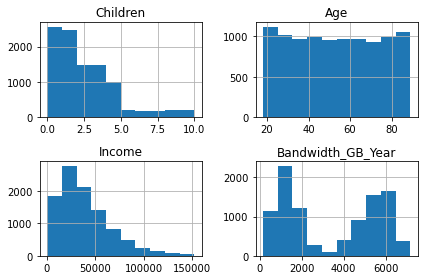

In [12]:
#Histogram of univariate statistical visualization of continuous variables
df[['Children', 'Age', 'Income','Bandwidth_GB_Year']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

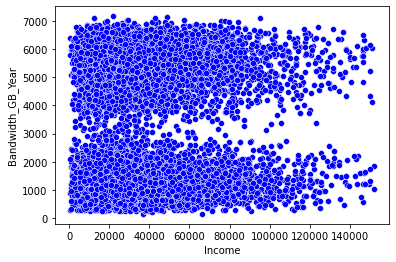

In [13]:
#vBivariate Visualizations - Scatterplot
sns.scatterplot(x=df['Income'], y=df['Bandwidth_GB_Year'], color='blue')
plt.show();


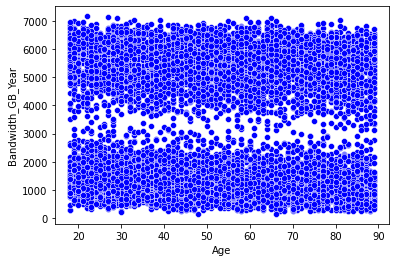

In [14]:
sns.scatterplot(x=df['Age'], y=df['Bandwidth_GB_Year'], color='blue')
plt.show();

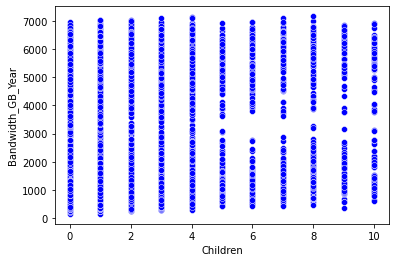

In [15]:
sns.scatterplot(x=df['Children'], y=df['Bandwidth_GB_Year'], color='blue')
plt.show();

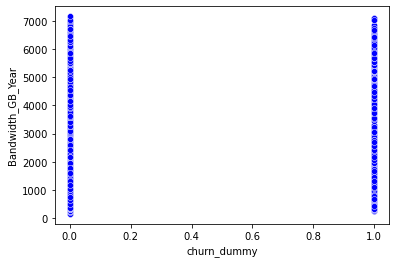

In [16]:
sns.scatterplot(x=df['churn_dummy'], y=df['Bandwidth_GB_Year'], color='blue')
plt.show();

In [17]:
# Extract Clean dataset

df = pd.read_csv('churn_prepared.csv')
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9955        9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9956        9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9957        9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9958        9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9959        9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                           

In [18]:
#Linear Regression Model #1- based on kitchen sink method
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['intercept'] = 1
mode1 = sm.OLS(df['Bandwidth_GB_Year'], df[['Children','gender_dummy', 'Age','Income', 'churn_dummy','intercept']]).fit()
print(mode1.summary())


                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     485.7
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:21:23   Log-Likelihood:                -89632.
No. Observations:                9960   AIC:                         1.793e+05
Df Residuals:                    9954   BIC:                         1.793e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Children        24.2033      9.150      2.645   

In [19]:
#Reduced Linear Regression Model - wrapper method- (Backward Stepwise elimination)

df['intercept'] = 2
reduced_mode1 = sm.OLS(df['Bandwidth_GB_Year'], df[['churn_dummy','Children', 'intercept']]).fit()
print (reduced_mode1.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1212.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:23:08   Log-Likelihood:                -89634.
No. Observations:                9960   AIC:                         1.793e+05
Df Residuals:                    9957   BIC:                         1.793e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
churn_dummy -2188.4198     44.526    -49.149      